## Novikov Artyom J41332c

## Required imports

In [207]:
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [208]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Artyom\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [209]:
#Reading data from csv
df = pd.read_csv('C:/Users/Artyom/Desktop/itmo_study/ML_spring_2021/Tasks/Task1/bioresponse.csv')
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


## Dataprep

In [210]:
df_target = df.Activity.values

In [211]:
df_data = df.iloc[:, 1:]

In [212]:
train_data, test_data, train_labels, test_labels = train_test_split(df_data, df_target, test_size = 0.3, random_state = 1)

## Small Desicion Tree

In [213]:
#train a model
small_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
#fit data
small_dt = small_dt.fit(train_data,train_labels)

In [214]:
#making a prediction
prediction = small_dt.predict(test_data)
#printing the metrics
print("precision = ", precision_score(test_labels, prediction))
print("recall    = ", recall_score(test_labels, prediction))
print("accuracy  = ",  accuracy_score(test_labels, prediction))
print("f1        = ",  f1_score(test_labels, prediction))
print("log-loss  = ", log_loss(test_labels, prediction))

precision =  0.748587570621469
recall    =  0.8520900321543409
accuracy  =  0.7602131438721137
f1        =  0.7969924812030076
log-loss  =  8.282071007964884


In [215]:
y_proba = small_dt.predict_proba(test_data)
y_proba

array([[0.48322148, 0.51677852],
       [0.7781155 , 0.2218845 ],
       [0.7781155 , 0.2218845 ],
       ...,
       [0.7781155 , 0.2218845 ],
       [0.20512821, 0.79487179],
       [0.7781155 , 0.2218845 ]])

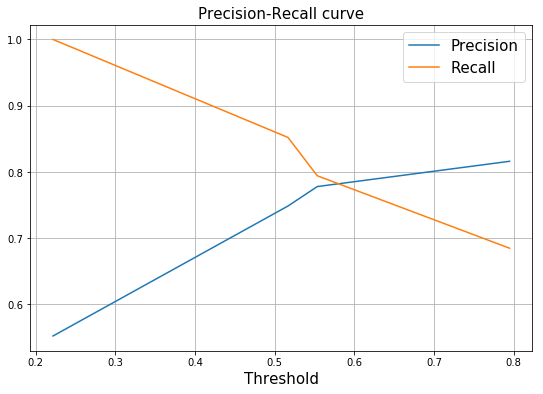

In [216]:
#plotting the Precision-Recall curve
prec, rec, thresh = precision_recall_curve(test_labels, y_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

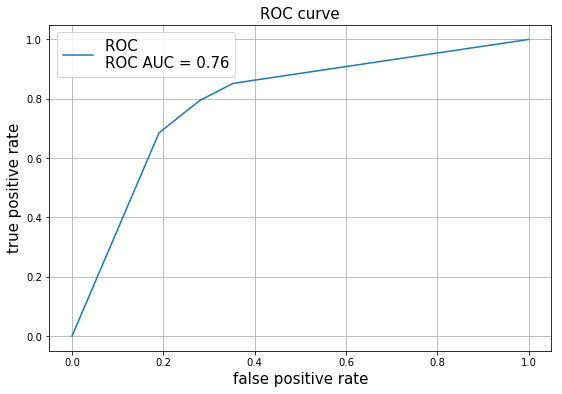

In [217]:
#plotting the ROC curve
fpr, tpr, thr = roc_curve(test_labels, y_proba[:,1])
roc_auc = roc_auc_score(prediction,test_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

## Deep Desicion Tree

In [218]:
#train a model
deep_dt = DecisionTreeClassifier(max_depth = 15, random_state = 1)
#fit data
deep_dt = deep_dt.fit(train_data,train_labels)

In [219]:
#making a prediction
prediction = deep_dt.predict(test_data)
#printing the metrics
print("precision = ", precision_score(test_labels, prediction))
print("recall    = ", recall_score(test_labels, prediction))
print("accuracy  = ",  accuracy_score(test_labels, prediction))
print("f1        = ",  f1_score(test_labels, prediction))
print("log-loss  = ", log_loss(test_labels, prediction))

precision =  0.7623762376237624
recall    =  0.7427652733118971
accuracy  =  0.7300177619893428
f1        =  0.752442996742671
log-loss  =  9.324958406823088


In [220]:
y_proba = deep_dt.predict_proba(test_data)
y_proba

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.95      , 0.05      ],
       ...,
       [0.95695364, 0.04304636],
       [1.        , 0.        ],
       [1.        , 0.        ]])

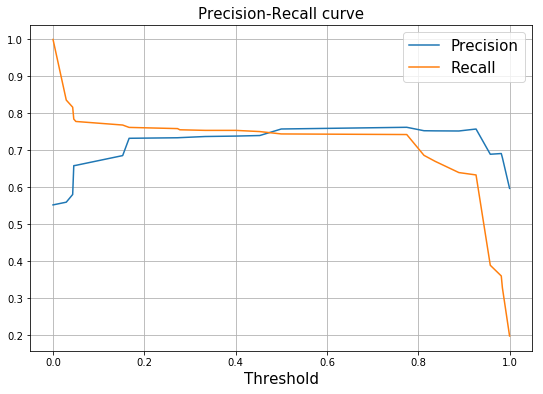

In [221]:
#plotting the Precision-Recall curve
prec, rec, thresh = precision_recall_curve(test_labels, y_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

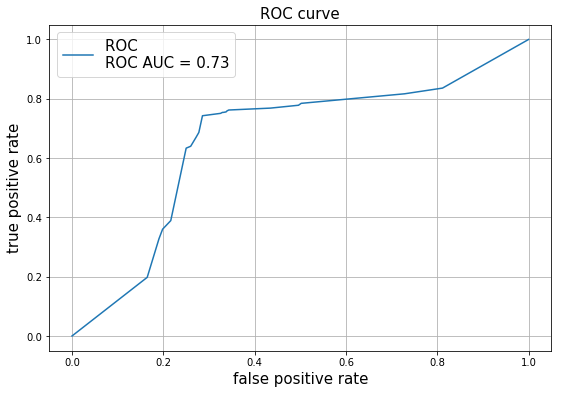

In [222]:
#plotting the ROC curve
fpr, tpr, thr = roc_curve(test_labels, y_proba[:,1])
roc_auc = roc_auc_score(prediction,test_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

## Random Forest Small Trees

In [223]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd

In [224]:
#train a model
random_forest_st = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [225]:
#fit data
random_forest_st.fit(train_data, train_labels)
#making a prediction
prediction = random_forest_st.predict(test_data)

In [226]:
#printing the metrics
print("precision = ", precision_score(test_labels, prediction))
print("recall    = ", recall_score(test_labels, prediction))
print("accuracy  = ",  accuracy_score(test_labels, prediction))
print("f1        = ",  f1_score(test_labels, prediction))
print("log-loss  = ", log_loss(test_labels, prediction))

precision =  0.6931506849315069
recall    =  0.8135048231511254
accuracy  =  0.6980461811722913
f1        =  0.7485207100591715
log-loss  =  10.42927449741918


In [227]:
y_proba = random_forest_st.predict_proba(test_data)
y_proba

array([[0.54670516, 0.45329484],
       [0.4920037 , 0.5079963 ],
       [0.51520128, 0.48479872],
       ...,
       [0.54061104, 0.45938896],
       [0.33895292, 0.66104708],
       [0.48651284, 0.51348716]])

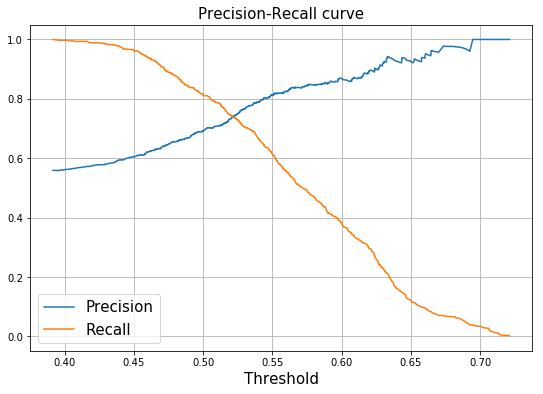

In [228]:
#plotting the Precision-Recall curve
prec, rec, thresh = precision_recall_curve(test_labels, y_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

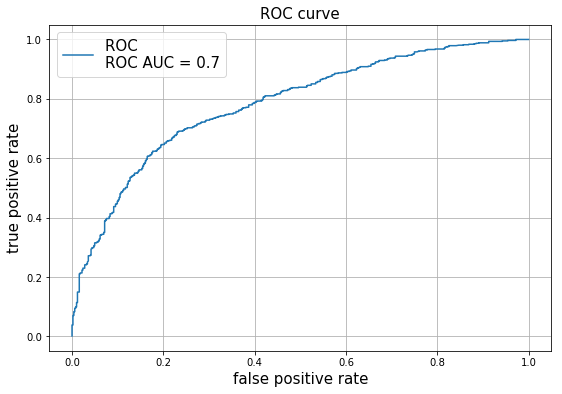

In [229]:
#plotting the ROC curve
fpr, tpr, thr = roc_curve(test_labels, y_proba[:,1])
roc_auc = roc_auc_score(prediction,test_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

## Random Forest Deep Trees

In [230]:
#train a model
random_forest_dt = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [231]:
#fit data
random_forest_dt.fit(train_data, train_labels)
#making a prediction
prediction = random_forest_dt.predict(test_data)

In [232]:
#printing the metrics
print("precision = ", precision_score(test_labels, prediction))
print("recall    = ", recall_score(test_labels, prediction))
print("accuracy  = ",  accuracy_score(test_labels, prediction))
print("f1        = ",  f1_score(test_labels, prediction))
print("log-loss  = ", log_loss(test_labels, prediction))

precision =  0.8039538714991763
recall    =  0.7845659163987139
accuracy  =  0.7753108348134992
f1        =  0.7941415785191211
log-loss  =  7.760573339259857


In [233]:
y_proba = random_forest_dt.predict_proba(test_data)
y_proba

array([[0.5482072 , 0.4517928 ],
       [0.42584115, 0.57415885],
       [0.80220587, 0.19779413],
       ...,
       [0.74929787, 0.25070213],
       [0.31685469, 0.68314531],
       [0.65972951, 0.34027049]])

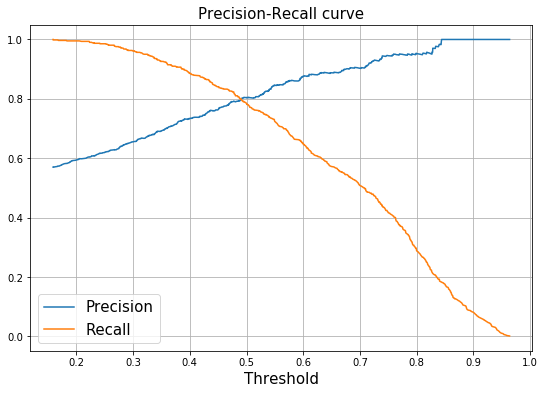

In [234]:
#plotting the Precision-Recall curve
prec, rec, thresh = precision_recall_curve(test_labels, y_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

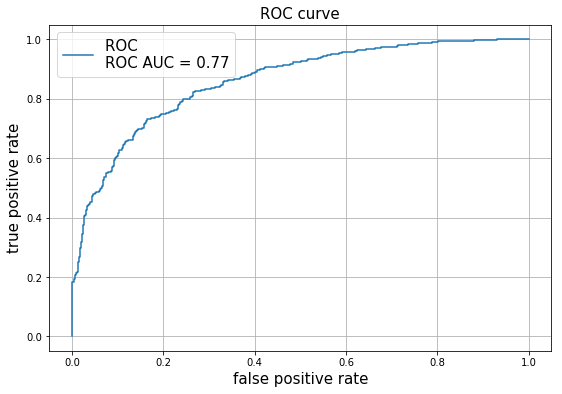

In [235]:
#plotting the ROC curve
fpr, tpr, thr = roc_curve(test_labels, y_proba[:,1])
roc_auc = roc_auc_score(prediction,test_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

## Train a classifier that avoids Type II errors 

In [236]:
# To avoid the Type 2 errors we add the "class_weight" attribute, which balances the class weights
forest_fn = RandomForestClassifier(max_depth=15, class_weight={0: 1, 1: 8}, random_state=1)
forest_fn = forest_fn.fit(train_data, train_labels)
y_proba = forest_fn.predict_proba(test_data)
y_proba

array([[0.6163962 , 0.3836038 ],
       [0.32754837, 0.67245163],
       [0.92402235, 0.07597765],
       ...,
       [0.44846726, 0.55153274],
       [0.0181927 , 0.9818073 ],
       [0.72501435, 0.27498565]])

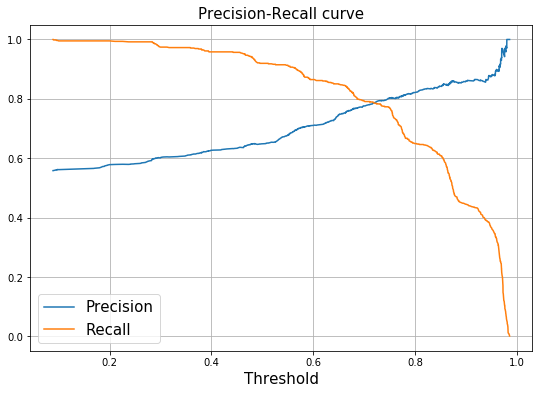

In [238]:
prec, rec, thresh = precision_recall_curve(test_labels, y_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

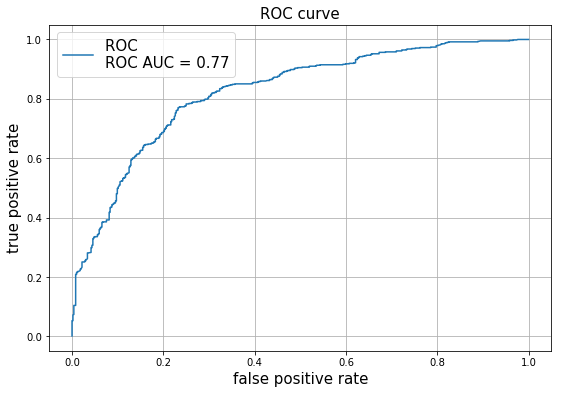

In [239]:
fpr, tpr, thr = roc_curve(test_labels, y_proba[:,1])
roc_auc = roc_auc_score(prediction,test_labels)
plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)